#Basic median filter (2015.10.06 DW KT)

___Comments:___ Import all used libraries

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

___Comments:___   Show matplotlib graphics in the Ipython Notebook

In [32]:
%matplotlib inline

## programming and testing medianFilter()

___Comments:___ Creating an array (tempret) and save the median filtered values in it, check if windowLength is smaller then the length of the data arry and make sure, data is a 1D array.

In [33]:
def medianFilter( data, windowLength ): 
    if (windowLength < len(data)and data.ndim == 1):
        tempret = np.zeros(len(data)-windowLength+1)
        for c in range(0, len(tempret)):
            tempret[c] = np.median( data[ c : c + windowLength ] )
        return tempret
    else:
         raise ValueError("windowLength must be smaller than len(data) and data must be a 1D array")

## programing and testing medianSinPlot()

___Comments:___ Creating the "data" array and save the Sine wave in it. Plot the Sine and median filtered wave.

In [34]:
def medianSinPlot( waveNumber, windowLength ):
    data = np.fromfunction( lambda x: np.sin((x-windowLength / 2)/128 * 2 * np.pi * waveNumber), (128 + windowLength / 2, ) )
    datafiltered = medianFilter(data, windowLength)
    data = data[ windowLength / 2 : - windowLength ]
    datafiltered = datafiltered[ : len(data) ]
    plt.plot( data )
    plt.plot( datafiltered ) 
    plt.plot( data-datafiltered)  

___Comments:___ Plotting 20 different sine waves and the median filtered waves in one figure.

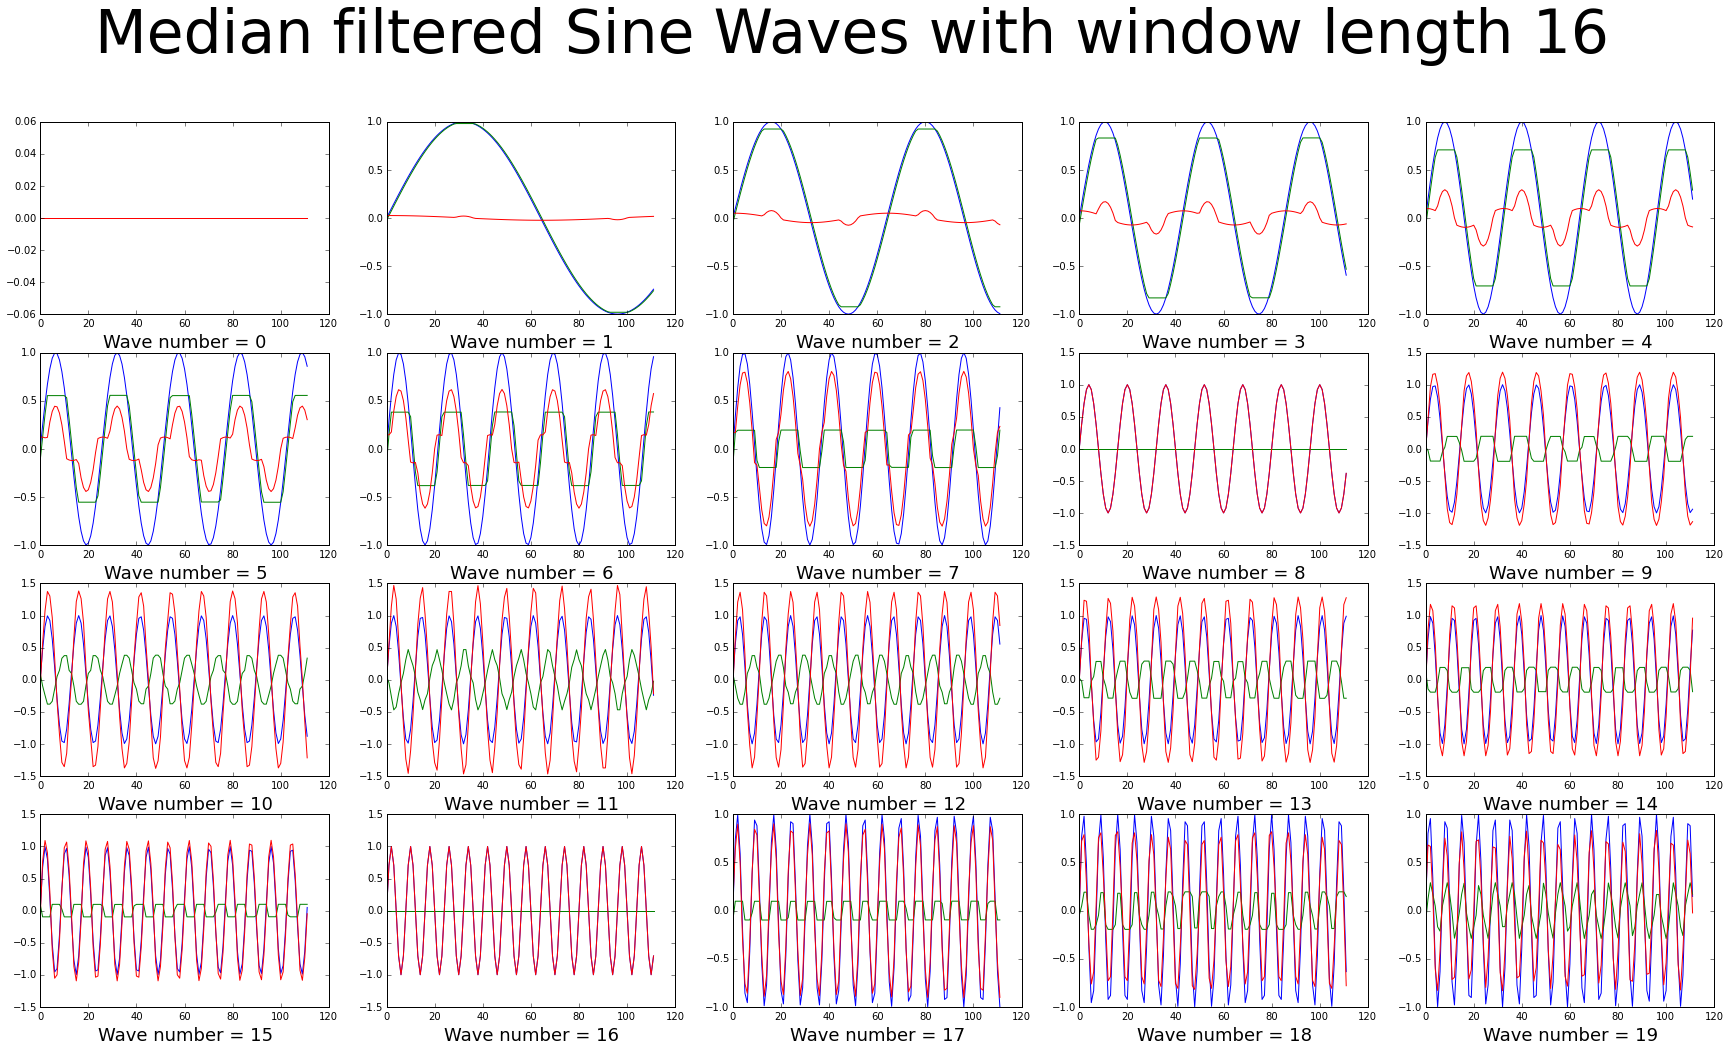

In [35]:
median = plt.figure(figsize=(30,20))
for x in range(1, 5):
    for y in range(1, 6):
        plt.subplot(5, 5, x + (y-1)*4)
        wavenum = (x-1) + (y-1)*4
        medianSinPlot( wavenum, 16 )
        plt.suptitle('Median filtered Sine Waves with window length 16', fontsize = 60)
        plt.xlabel(("Wave number = "+str((x-1) + (y-1)*4)), fontsize=18)

##Graphic Export

___Comments:___ Export the figure and save it as .pdf.

In [36]:
pp=PdfPages( 'median sin window length 16.pdf' )
pp.savefig( median )
pp.close()